In [1]:
import pathlib

from falafel import utils, qe

from pixell import lensing, curvedsky

import solenspipe

import pytempura

import healpy as hp

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


nside = 4096
noise_sigma = 17
mlmax = 6000
fwhm = 1.4

kappa_lmin, kappa_lmax = 100, 3000

source_dir = pathlib.Path('/global/cscratch1/sd/omard/scatteringtfms/sims/')

kappa_name = 'healpix_4096_KappaeffLSStoCMBfullsky.fits'
cmb_name = 'Sehgalsimparams_healpix_4096_KappaeffLSStoCMBfullsky_phi_SimLens_Tsynfastnopell_fast_lmax8000_nside4096_interp2.5_method1_1_lensed_map.fits'
tsz_name = 'tSZ_skymap_healpix_nopell_Nside4096_y_tSZrescale0p75.fits'

mappa_tsz = hp.read_map(source_dir/tsz_name)

/global/homes/o/omard/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [2]:
maschera = np.load(source_dir/'maschera.npy')

In [3]:
mappa_tsz_masked = maschera*mappa_tsz

In [31]:
cltsz = hp.anafast(mappa_tsz)

In [50]:
mappa_tsz_2 = hp.pixelfunc.ud_grade(mappa_tsz, 2*nside)

In [51]:
cltsz2 = hp.anafast(mappa_tsz_2)

In [5]:
cltsz_masked = hp.anafast(mappa_tsz_masked, pol = False)

In [33]:
tsz_power = 'Sehgal_sim_tSZPS_unbinned_8192_y_rescale0p75.txt'
ell, cltsz_lambda = np.loadtxt(source_dir/tsz_power, unpack = True)

In [14]:
ls = np.arange(0, len(cltsz_masked))

In [15]:
w2 = np.mean(maschera**2.)

In [18]:
cltsz_masked.shape

(12288,)

In [26]:
from szar import foregrounds as sfg
powery = sfg.power_y(ls)
powery[0] = 1e-10

/global/homes/o/omard/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/szar/foregrounds.py:180: UserWarning: Warning: Requested ells go higher than available. Extrapolating above highest ell.
  warnings.warn("Warning: Requested ells go higher than available." + \
/global/homes/o/omard/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/szar/foregrounds.py:63: RuntimeWarning: divide by zero encountered in true_divide
  cls = A_tsz * dls*2.*np.pi*np.nan_to_num(1./ells/(ells+1.)) / ffunc(nu0)**2./tcmb**2.


In [43]:
pixel_window = hp.sphtfunc.pixwin(nside)
lpixel = np.arange(0, len(pixel_window))
p4096 = np.interp(ell, lpixel, pixel_window)

In [44]:
pixel_window_2 = hp.sphtfunc.pixwin(2*nside)
lpixel = np.arange(0, len(pixel_window))
p8192 = np.interp(ell, lpixel, pixel_window)

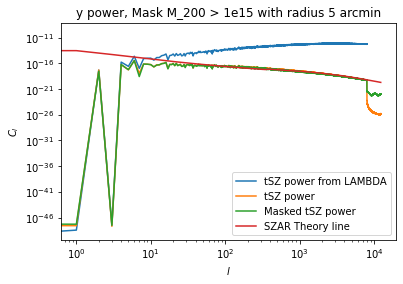

In [46]:
plt.title('y power, Mask M_200 > 1e15 with radius 5 arcmin')
plt.xlabel('$l$')
plt.ylabel('$C_l$')
plt.loglog(ell, cltsz_lambda/p8192**2.*p4096**2., label = 'tSZ power from LAMBDA')
plt.loglog(ls, cltsz, label = 'tSZ power')
plt.loglog(ls, cltsz_masked/w2, label = 'Masked tSZ power')
plt.loglog(ls, powery, label = 'SZAR Theory line')
plt.legend()